# Einführung Statistiklabor

## 4. Übung - Zuckerpackung
## Normalverteilung

In diesem Beispiel lernen Sie einige Statistik-Funktionen kennen, mit denen man Berechnungen bei der wichtigsten stetigen Wahrscheinlichkeitsverteilung, nämlich der Normalverteilung, durchführen kann. 

Eine Maschine füllt Zucker in Packungen. Die Füllmenge variiert zufällig. Die Zufallsvariable $X$ gebe die Füllmenge [in $g$] einer zufällig ausgewählten Zuckerpackung an. 

Wir gehen in diesem Beispiel davon aus dass die Zufallsvariable $X$ einer Normalverteilung $X\sim N(\mu=1000;\sigma^2 9)$
folgt. In diesem Beispiel ist also der Erwartungswert der Füllmenge $\mu =1.000\,[g]$, Varianz der
Füllmenge $\sigma^2=9\,[g^2]$ und Standardabweichung der Füllmenge $\sigma=3\,[g]$.

a) Berechnen Sie die **Wahrscheinlichkeit**, dass die Füllmenge einer zufällig ausgewählten Zuckerpackung bei **höchstens $994\,g$** liegt.<br>
*Die gesuchte Wahrscheinlichkeit $P(X \leq 994)$ ist ein Wert der Verteilungsfunktion $F(x) = P(X \leq x)$ für $x = 994$.*

In [1]:
from scipy.stats import norm

mu = 1000
sigma = 3

X = norm(mu, sigma) # ACHTUNG in Python Standardabweichung; NICHT Varianz!

In [2]:
X.cdf(994) # cdf = cumulative density function
print('Wahrscheinlichkeit, dass die Füllmenge höchstens 994 g beträgt: p = %.4f' %X.cdf(994))

Wahrscheinlichkeit, dass die Füllmenge höchstens 994 g beträgt: p = 0.0228


**Zusatz:** Die Wahrscheinlichkeit, dass **mindestens $1.000\,g$** in der Zuckerpackung enthalten sind:

In [3]:
print('Wahrscheinlichkeit, dass mindestens 1.000 g in einer Zuckerpackung sind: p = %.4f' %(1-X.cdf(1000)))

Wahrscheinlichkeit, dass mindestens 1.000 g in einer Zuckerpackung sind: p = 0.5000


**Zusatz:** Die Wahrscheinlichkeit, dass das Gewicht **zwischen $999\,g$ und $1.002\,g$** liegt:

In [4]:
print('Wahrscheinlichkeit, dass das Gewicht zwischen 999 g und 1.002 g liegt: p = %.4f' % (X.cdf(1002)-X.cdf(999)))

Wahrscheinlichkeit, dass das Gewicht zwischen 999 g und 1.002 g liegt: p = 0.3781


b) Berechnen Sie das **1\%-Quantil** der Normalverteilung $X \sim N(1000;9)$. Das ist diejenige Füllmenge, die von einer zufällig ausgewählten Zuckerpackung nur mit einer Wahrscheinlichkeit von $0,01$ unterschritten wird. <br>
*Die Berechnung von Quantilen ist die Umkehrung der Wahrscheinlichkeitsberechnung. Hierbei wird eine Wahrscheinlichkeit $\alpha$ vorgegeben und der entsprechende Wert/das Quantil $q_{\alpha}$ wird gesucht, so dass $P(X \leq q_{\alpha}) = \alpha$.*

In [5]:
alpha = 0.01
# ppf=percentage point function
norm.ppf(alpha, loc = mu, scale = sigma).round(4) # Erwartungswert als loc, sowie die Standardabweichung als scale

993.021

In [6]:
print('Das 1%%-Quantil der Zuckerpackungen beträgt: z = %.4f g' %X.ppf(alpha))

Das 1%-Quantil der Zuckerpackungen beträgt: z = 993.0210 g


c) Mit welcher Funktion können die Quantile der so genannten **$t$-Verteilung** berechnet werden? 

In [7]:
from scipy.stats import t

df = 5

# mit Standardreihenfolge der Argumente, diese nicht extra angeben:
#t.ppf(alpha, df, mu, sigma).round(4) # loc=mu, scale=sigma

X_t=t(df,mu,sigma)
X_t.ppf(alpha).round(4)

989.9052

d) Zeichnen Sie die **Dichtefunktion** der Zufallsvariablen $X$ im Intervall $[990; 1010]$.

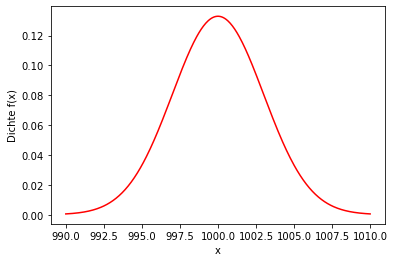

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(990, 1010.05, 0.05) # erzeugen einer Range von 990 bis 1010 in 0.05 Schritten
y_values = norm.pdf(x_values, mu, sigma) # pdf=probability density function

plt.plot(x_values, y_values, color='r') 
plt.xlabel('x')
plt.ylabel('Dichte f(x)')
plt.show()

**Zusatz:** Gegenüberstellung der Dichtefunktion der Normalverteilung & t-Verteilung

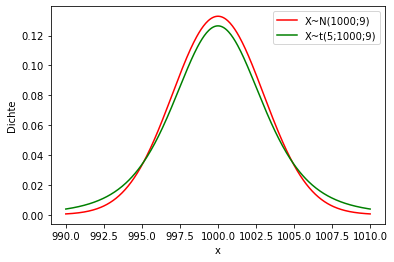

In [9]:
df = 5
t_values = t.pdf(x_values, df, mu, sigma)

plt.plot(x_values, y_values, color='r', label='X~N(%i;%i)'%(mu, sigma**2))
plt.plot(x_values, t_values, color='g', label='X~t(%i;%i;%i)'%(df, mu, sigma**2))
plt.xlabel('x') 
plt.ylabel('Dichte')
plt.legend()
plt.show()